In [1]:
from pandas_datareader import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tickers  = ['SPY','FEZ','VT','GLD','TLT']

In [3]:
r_port = data.DataReader(tickers, 
                       start='2011-1-1', 
                       end='2021-7-31',
                       data_source='yahoo')['Close']

In [4]:
r_port.tail()

Symbols,SPY,FEZ,VT,GLD,TLT
Date,,,,,
2021-07-26,441.019989,46.910000,104.459999,168.160004,148.059998
2021-07-27,439.010010,46.720001,103.779999,168.440002,149.639999
2021-07-28,438.829987,47.000000,104.330002,169.289993,149.649994
2021-07-29,440.649994,47.360001,104.839996,171.169998,148.820007
2021-07-30,438.510010,47.029999,104.250000,169.820007,149.520004


In [5]:
r_port.isna().sum()

Symbols
SPY    0
FEZ    0
VT     0
GLD    0
TLT    0
dtype: int64

<AxesSubplot:xlabel='Date'>

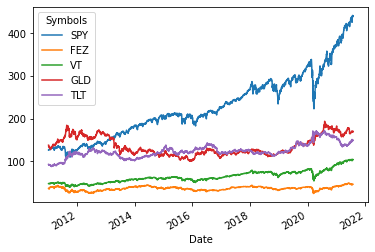

In [6]:
r_port.plot()

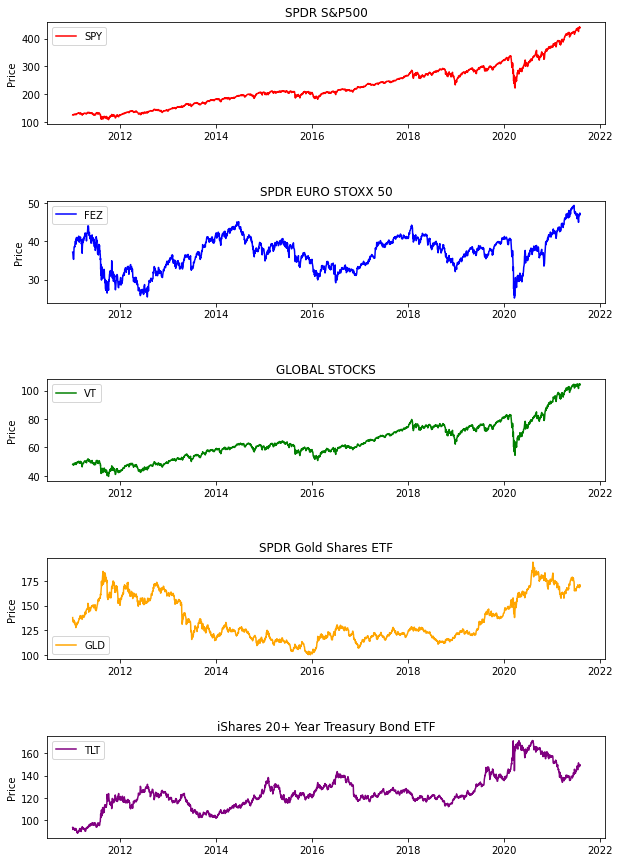

In [7]:
def plotter():
    plt.figure(figsize=(10,15))
    plt.subplot(5,1,1)
    plt.plot(r_port.index, r_port.iloc[:,0], color = 'r')
    plt.title('SPDR S&P500')
    plt.legend(['SPY'])
    plt.ylabel('Price')

    plt.subplot(5,1,2)
    plt.plot(r_port.index, r_port.iloc[:,1],  color = 'b')
    plt.title('SPDR EURO STOXX 50')
    plt.legend(['FEZ'])
    plt.ylabel('Price')

    plt.subplot(5,1,3)
    plt.plot(r_port.index, r_port.iloc[:,2], color = 'g')
    plt.title('GLOBAL STOCKS')
    plt.legend(['VT'])  
    plt.ylabel('Price')

    plt.subplot(5,1,4)
    plt.plot(r_port.index, r_port.iloc[:,3], color = 'orange')
    plt.title('SPDR Gold Shares ETF')
    plt.legend(['GLD'])
    plt.ylabel('Price')

    plt.subplot(5,1,5)
    plt.plot(r_port.index, r_port.iloc[:,4], color = 'purple')
    plt.title('iShares 20+ Year Treasury Bond ETF')
    plt.legend(['TLT'])
    plt.ylabel('Price')

    plt.subplots_adjust(hspace=0.75)
    plt.show()
plotter()

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(1,5))

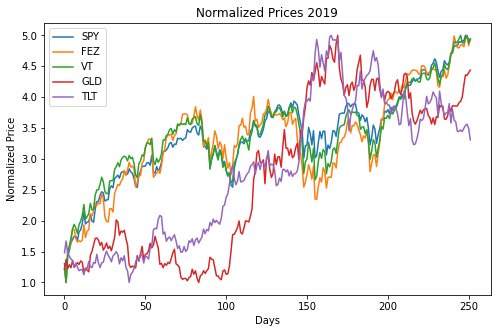

In [9]:
def tn_port(r_port):
    n_port = r_port.loc['2019-1-2':'2019-12-31']
    n_port =scaler.fit_transform(n_port)
    plt.figure(figsize=(8,5))
    plt.plot(n_port)
    plt.title('Normalized Prices 2019')
    plt.ylabel('Normalized Price')
    plt.xlabel('Days')
    plt.legend(['SPY','FEZ','VT','GLD','TLT'])
 
tn_port(r_port)

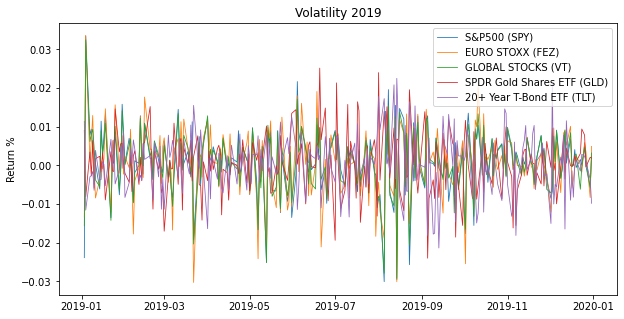

In [10]:
def pct_change(r_port):
    pct_change = r_port.loc['2019-1-2':'2019-12-31'].pct_change()
    pct_change.dropna(inplace=True)
    plt.figure(figsize=(10,5))
    plt.tick_params(which='both')
    plt.ylabel('Return %')
    plt.title('Volatility 2019')
    #plt.axhline(y=0, xmin=pct_change.index[0],xmax=pct_change.index[-1], color='r', linestyle='-')
    plt.plot(pct_change, linewidth=0.8)
    plt.legend(['S&P500 (SPY)','EURO STOXX (FEZ)','GLOBAL STOCKS (VT)', 'SPDR Gold Shares ETF (GLD)','20+ Year T-Bond ETF (TLT)'])
    
pct_change(r_port)

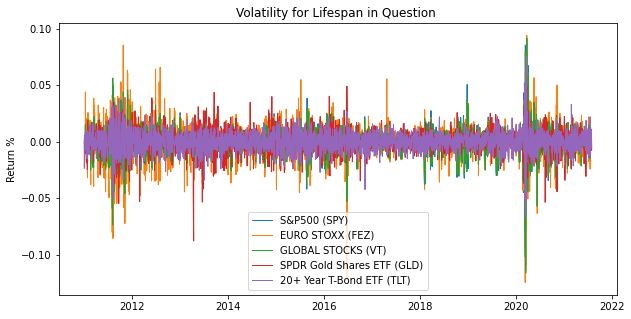

In [11]:
def pct_change2(r_port):
    pct_change = r_port.pct_change()
    pct_change.dropna(inplace=True)
    plt.figure(figsize=(10,5))
    plt.tick_params(which='both')
    plt.ylabel('Return %')
    plt.title('Volatility for Lifespan in Question ')
    #plt.axhline(y=0, xmin=pct_change.index[0],xmax=pct_change.index[-1], color='r', linestyle='-')
    plt.plot(pct_change, linewidth=1)
    plt.legend(['S&P500 (SPY)','EURO STOXX (FEZ)','GLOBAL STOCKS (VT)', 'SPDR Gold Shares ETF (GLD)','20+ Year T-Bond ETF (TLT)'])
    
pct_change2(r_port)

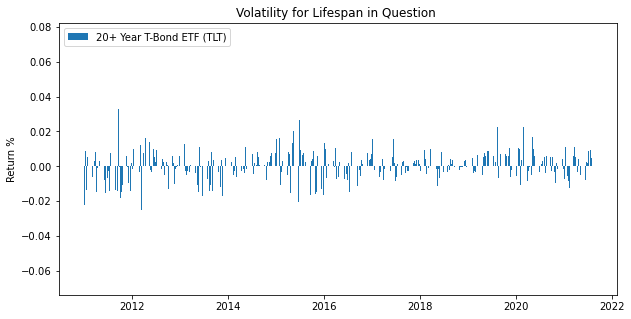

In [21]:
def pct_change3(r_port):
    pct_changee = r_port.pct_change()
    pct_changee.dropna(inplace=True)
    rf = pd.DataFrame(pct_changee.iloc[:,4])
    plt.figure(figsize=(10,5))
    plt.tick_params(which='both')
    plt.ylabel('Return %')
    plt.title('Volatility for Lifespan in Question ')
    #plt.axhline(y=0, xmin=pct_change.index[0],xmax=pct_change.index[-1], color='r', linestyle='-')
    plt.bar(rf.index,rf.iloc[:,0] )
    plt.legend(['20+ Year T-Bond ETF (TLT)'])

pct_change3(r_port)

In [ ]:
def plotter2():
    pct_change = r_port.loc['2019-1-2':'2019-12-31'].pct_change()
    pct_change.dropna(inplace=True)
    plt.figure(figsize=(10,10))

    plt.subplot(5,1,1)
    plt.plot(pct_change.index, pct_change.iloc[:,0], color = 'r')
    plt.title('SPDR S&P500')
    plt.legend(['SPY'])
    plt.ylabel('Price')

    plt.subplot(5,1,2)
    plt.plot(pct_change.index, pct_change.iloc[:,1],  color = 'b')
    plt.title('SPDR EURO STOXX 50')
    plt.legend(['FEZ'])
    plt.ylabel('Price')

    plt.subplot(5,1,3)
    plt.plot(pct_change.index, pct_change.iloc[:,2], color = 'g')
    plt.title('GLOBAL STOCKS')
    plt.legend(['VT'])  
    plt.ylabel('Price')

    plt.subplot(5,1,4)
    plt.plot(pct_change.index, pct_change.iloc[:,3], color = 'orange')
    plt.title('SPDR Gold Shares ETF')
    plt.legend(['GLD'])
    plt.ylabel('Price')

    plt.subplot(5,1,5)
    plt.plot(pct_change.index, pct_change.iloc[:,4], color = 'purple')
    plt.title('iShares 20+ Year Treasury Bond ETF')
    plt.legend(['TLT'])
    plt.ylabel('Price')
    


    plt.subplots_adjust(hspace=0.5)
    plt.show()
plotter2()

In [ ]:
import seaborn as sns

In [ ]:
r_port.corr()

In [ ]:
heatmap = sns.heatmap(r_port.corr(), annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);